In [48]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Charger le jeu de données
file_path = '../data/high_diamond_ranked_10min.csv'
data = pd.read_csv(file_path)

In [4]:
# Étape 1: Vérification des valeurs manquantes dans le jeu de données
missing_values = data.isnull().sum()

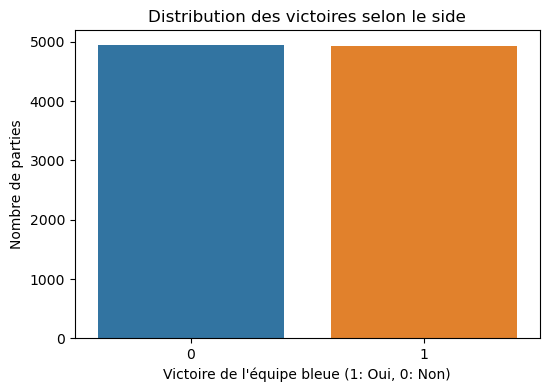

In [7]:
# Étape 2: Analyse de la distribution de la variable cible 'blueWins'
plt.figure(figsize=(6,4))
sns.countplot(x='blueWins', data=data)
plt.title('Distribution des victoires selon le side')
plt.xlabel('Victoire de l\'équipe bleue (1: Oui, 0: Non)')
plt.ylabel('Nombre de parties')
plt.show()

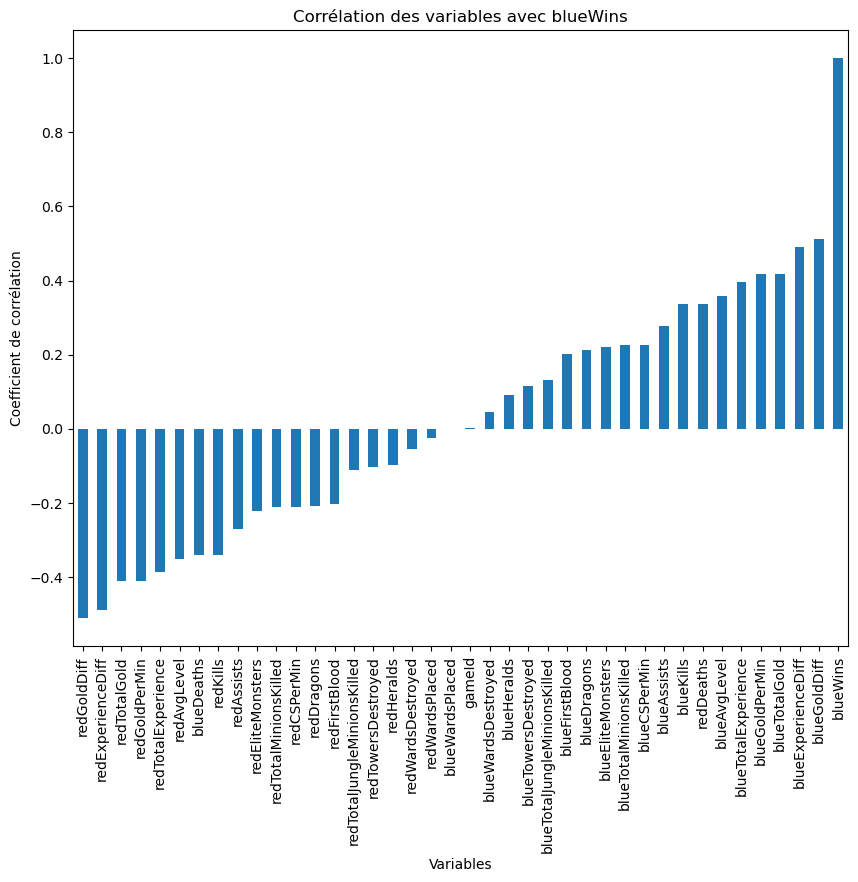

In [16]:
# Calculer la corrélation de toutes les variables avec 'blueWins'
correlations = data.corr()['blueWins'].sort_values()

plt.figure(figsize=(10,8))
correlations.plot(kind='bar')
plt.title('Corrélation des variables avec blueWins')
plt.xlabel('Variables')
plt.ylabel('Coefficient de corrélation')
plt.show()

In [23]:
# Sélectionner les variables ayant une corrélation significative avec 'blueWins'
threshold = 0.1
significant_features = correlations[(correlations > threshold) | (correlations < -threshold)]
significant_features = significant_features.index.tolist()
significant_features.remove('blueWins')  # Retirer la variable cible de la liste

In [24]:
# Étape 4: Préparation des données pour la modélisation
# Séparer les variables explicatives (X) et la variable cible (y)
X = data[significant_features]
y = data['blueWins']

In [25]:
# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Créer une instance du modèle RandomForestClassifier
model = RandomForestClassifier(random_state=42)


# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Étape 6: Évaluation du modèle
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [32]:
# Calculer et afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

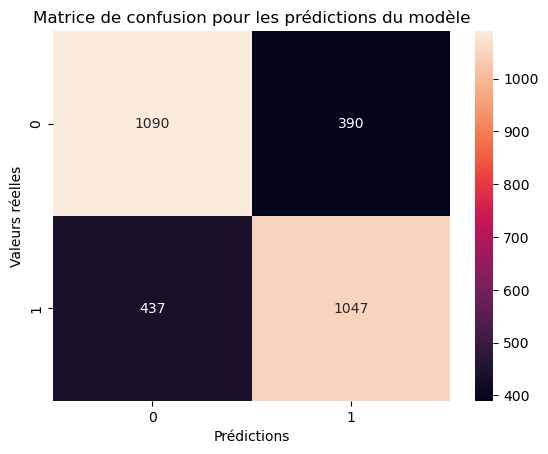

In [33]:
# Afficher la matrice de confusion avec Seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matrice de confusion pour les prédictions du modèle')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

In [34]:
# Afficher la précision du modèle et le rapport de classification
print(f"Précision du modèle: {acc:.2f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle: 0.72
Rapport de classification :
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      1480
           1       0.73      0.71      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [35]:
# Sauvegarder les corrélations et les valeurs manquantes pour référence future
correlations.to_csv('C:/Users/Adam/Documents/mlops/correlations_with_blueWins.csv')
missing_values.to_csv('C:/Users/Adam/Documents/mlops/missing_values.csv')


In [36]:
# Retourner les chemins des fichiers pour que l'utilisateur puisse les télécharger
file_paths = {
    'correlations_with_blueWins': 'C:/Users/Adam/Documents/mlops/correlations_with_blueWins.csv',
    'missing_values': 'C:/Users/Adam/Documents/mlops/missing_values.csv'
}

In [37]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons requis à chaque feuille de nœud
    'bootstrap': [True, False]        # Méthode de sélection des échantillons pour l'entraînement de chaque arbre
}


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Meilleurs hyperparamètres:
 {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      1480
           1       0.73      0.71      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

Confusion Matrix:
 [[1085  395]
 [ 428 1056]]
Accuracy Score: 0.7223346828609987


In [42]:
# Initialiser le modèle Random Forest
rf = RandomForestClassifier(random_state=42)

In [43]:
# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [44]:
# Entraîner le modèle avec GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits



KeyboardInterrupt



In [ ]:
# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres:\n", grid_search.best_params_)

In [ ]:
# Évaluation du modèle avec les meilleurs hyperparamètres trouvés
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

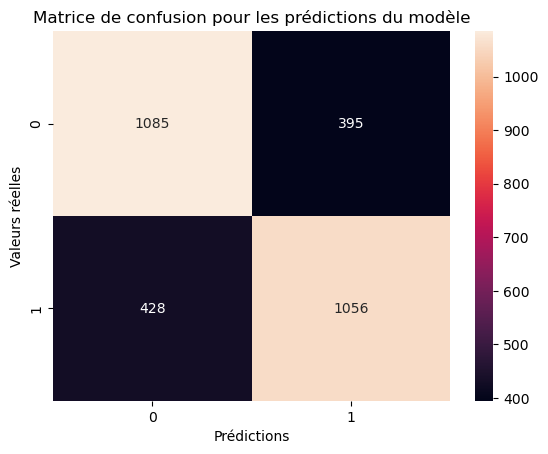

In [41]:
# Calculer et afficher la matrice de confusion
cm2 = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Afficher la matrice de confusion avec Seaborn
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Matrice de confusion pour les prédictions du modèle')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

In [45]:
## Regression logistique

In [49]:
# Initialiser un modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [50]:
# Entraîner le modèle sur l'ensemble d'entraînement
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Étape 6: Évaluation du modèle
# Faire des prédictions sur l'ensemble de test
y_pred_logistic = logistic_model.predict(X_test)

In [52]:
# Calculer et afficher la matrice de confusion
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
acc_logistic = accuracy_score(y_test, y_pred_logistic)

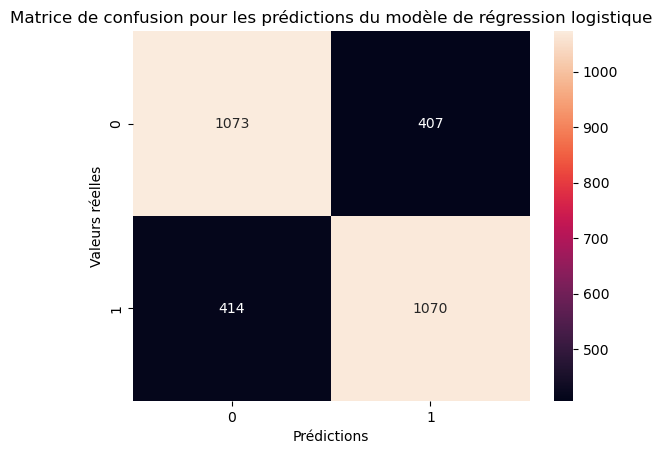

In [53]:
# Afficher la matrice de confusion avec Seaborn
sns.heatmap(cm_logistic, annot=True, fmt="d")
plt.title('Matrice de confusion pour les prédictions du modèle de régression logistique')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

In [54]:
# Afficher la précision du modèle et le rapport de classification
print(f"Précision du modèle de régression logistique: {acc_logistic:.2f}")
print("Rapport de classification de la régression logistique:\n", classification_report(y_test, y_pred_logistic))

Précision du modèle de régression logistique: 0.72
Rapport de classification de la régression logistique:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1480
           1       0.72      0.72      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

